<a href="https://colab.research.google.com/github/solobala/DLL30/blob/main/DLL30_DZ12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 12 - Работа  с текстом

* cкачать  [датасет с фразами симпсонов](https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data)
* обучить word2vec на фразах персонажей
* визуализировать embeddings по самым частотным словам (top 1000)
* найти самые близкие слова для:
    * homer - marge + bart
    * bart - lisa + school
    * marge - homer + home
* построить классификатор bart/lisa с использованием этих эмбеддингов

# Установка библиотек

In [1]:
!pip install gensim
!pip install compress-fasttext

  Preparing metadata (setup.py) ... done
  Created wheel for compress-fasttext: filename=compress_fasttext-0.1.4-py3-none-any.whl size=16096 sha256=1de18aa8fd194d31fa62eacf6bb724b2fc220aedfc48833232ba561bd5a61acb
  Stored in directory: /root/.cache/pip/wheels/ef/0f/e8/5873a842310e96066067d9300281979b4a7d74b46d938f440e
Successfully built compress-fasttext


In [2]:
!pip install wordcloud

In [5]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=acebe61d022f258e77859db788f86fddebe92daf2912dfc4ca7e12502444ee19
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [9]:
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.0 MB/s eta 0:00:00


In [29]:
!pip install nltk

# Импорт библиотек и пользовательские функции

In [3]:
from gensim import models as md
import compress_fasttext
from wordcloud import WordCloud

In [133]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [243]:
# добавляем  стоп-слова
english_stopwords = stopwords.words("english")

In [244]:
english_stopwords.extend(['im', 'oh','ohh','uh-oh','shes','moe','whoa','wasnt', 'am', 'whos','ooh', 'yo', 'hm', 'la','four', 'five', 'arent', 'doesnt', 'ones','hmm', 'hmmm', 'dont','youre', 'eh', 'em', 'ten','one','--','hey', 'na', 'ive', 'could', 'one', 'two', 'mr', 'theres', 'would', 'hes', 'theyre', 'youll', 'three', 'third','ta', 'ya', 'ah', 'isnt', 'ow', 'hi', 'ha','mmm', 'eight', 'nine', 'oooh', 'ooo', 'yayyyyyyyyyyyyyy', '--tiful', 'yaaauuuuggghhh', 'yaaauuuggghhh', 'mmphm', 'hnmph','arrghh', 'iiiiiii', 'mmmmmmmm', 'hoo--yea','ugh--ya','mmmm-',  'yayy', 'vay', 'eeww', 'iz',  'ooooooh', 'eeeeeewwwwww', 'mmm-mmm-mmm'])

In [246]:
len(english_stopwords)

240

In [247]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import string
from collections import Counter

In [248]:
from sklearn.manifold import TSNE

In [249]:
import umap
import umap.plot

In [250]:
import warnings
warnings.filterwarnings('ignore')

In [303]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [251]:
def cos_sim(x, y):
    return dot(x, y) / (norm(x) * norm(y))

In [252]:
def doc2words(doc):
    words=[]
    for line in doc:
      items = line.split()
      items = [i for i in items if (i not in english_stopwords)]
      words.append(items)
    return words

In [292]:
def getvocab(words):
  # Словарь из мешка слов
    bow = []
    for line in words:
      for word in line:
        bow.append(word)
    wordfreq = Counter(bow)
    sorted_wordfreq = sorted(wordfreq, key=wordfreq.get, reverse=True)
    return sorted_wordfreq

In [254]:
def clean(text) -> nltk.Text:
  # переводим символы в нижний регистр, чтобы всё было одинаково
  text = text.lower()

  # добавляем к стандартным знакам пунктуации кавычки и многоточие
  spec_chars = string.punctuation + '«»\t—…’'
  # очищаем текст от знаков препинания
  text = "".join([ch for ch in text if ch not in spec_chars])
  # подключаем регулярные выражения
  import re
  # меняем переносы строк на пробелы
  text = re.sub('\n', ' ', text)
  # убираем из текста цифры
  text = "".join([ch for ch in text if ch not in string.digits])
  # токенизируем текст
  text_tokens = word_tokenize(text)

  # переводим токены в текстовый формат
  text = nltk.Text(text_tokens)
  # перестраиваем токены, не учитывая стоп-слова
  text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]
  # снова приводим токены к текстовому виду
  text = nltk.Text(text_tokens)
  return text



In [210]:
# Проверка работы функции
text = 'mom look at the cat'
cleaned_text = clean(text)
print(cleaned_text)
word_list = cleaned_text.tokens
print(word_list)

<Text: mom look cat...>
['mom', 'look', 'cat']


# 1. Загрузка и предобработка данных

In [15]:
! unzip '/content/simpsons_script_lines.csv (1).zip'

Archive:  /content/simpsons_script_lines.csv (1).zip
  inflating: simpsons_script_lines.csv  


In [255]:
doc = pd.read_csv('/content/simpsons_script_lines.csv',usecols=['raw_character_text','normalized_text'], low_memory=False)
doc.head()

,raw_character_text,normalized_text
0,Miss Hoover,no actually it was a little of both sometimes ...
1,Lisa Simpson,wheres mr bergstrom
2,Miss Hoover,i dont know although id sure like to talk to h...
3,Lisa Simpson,that life is worth living
4,Edna Krabappel-Flanders,the polls will be open from now until the end ...


Столбец normalized_text уже частично предобработан:
* все символы переведены в нижний регистр,
* переносы строк заменены на пробелы
Осталось убрать стоп-слова, цифры, пустые строки, очистить от знаков препинания


In [256]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   raw_character_text  140749 non-null  object
 1   normalized_text     132087 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [257]:
# Удалим из датасета все пустые строки
doc.dropna(inplace=True)

In [258]:
sentences = doc['normalized_text'].astype(str).to_list()
sentences[:15]

['no actually it was a little of both sometimes when a disease is in all the magazines and all the news shows its only natural that you think you have it',
 'wheres mr bergstrom',
 'i dont know although id sure like to talk to him he didnt touch my lesson plan what did he teach you',
 'that life is worth living',
 'the polls will be open from now until the end of recess now just in case any of you have decided to put any thought into this well have our final statements martin',
 'i dont think theres anything left to say',
 'bart',
 'victory party under the slide',
 'mr bergstrom mr bergstrom',
 'hey hey he moved out this morning he must have a new job -- he took his copernicus costume',
 'do you know where i could find him',
 'i think hes taking the next train to capital city',
 'the train how like him traditional yet environmentally sound',
 'yes and its been the backbone of our country since leland stanford drove that golden spike at promontory point',
 'i see he touched you too']

In [259]:
# Убрали цифры и стоп слова, каждую фразу заменили на список слов
words = [clean(sentence).tokens for sentence in sentences]
words[:2]

[['actually',
  'little',
  'sometimes',
  'disease',
  'magazines',
  'news',
  'shows',
  'natural',
  'think'],
 ['wheres', 'bergstrom']]

In [302]:
# Снова собрали из оставшихся слов фразы
cleaned_sentences = []
for item in words:
  cleaned_sentences.append(' '.join(item))
# Переводим все предложения в один текстовый блок
text = ' '.join(cleaned_sentences)
tokenized_text = clean(text)
# считаем  частоту слов
fdist_sw = FreqDist(tokenized_text)
a = fdist_sw.most_common(1000)
b = [x[0] for x in a]
# показываем самые популярные слова по убыванию популярности
for i in range(1,100):
  print(b[10*(i-1): 10*i])

['well', 'like', 'get', 'know', 'got', 'thats', 'homer', 'right', 'go', 'bart']
['ill', 'see', 'good', 'yeah', 'think', 'want', 'cant', 'look', 'marge', 'gon']
['little', 'man', 'back', 'uh', 'dad', 'okay', 'time', 'us', 'come', 'take']
['never', 'say', 'simpson', 'make', 'lisa', 'yes', 'really', 'going', 'love', 'lets']
['way', 'something', 'need', 'sorry', 'boy', 'people', 'tell', 'day', 'please', 'sure']
['kids', 'give', 'let', 'thing', 'whats', 'new', 'didnt', 'mom', 'wait', 'first']
['great', 'ever', 'god', 'better', 'stop', 'sir', 'even', 'maybe', 'life', 'old']
['help', 'id', 'youve', 'thank', 'home', 'big', 'mean', 'much', 'made', 'said']
['put', 'show', 'still', 'work', 'money', 'school', 'son', 'springfield', 'always', 'call']
['last', 'thought', 'hello', 'every', 'name', 'family', 'must', 'guys', 'find', 'house']
['guy', 'years', 'huh', 'guess', 'things', 'bad', 'anything', 'baby', 'feel', 'wont']
['weve', 'thanks', 'night', 'next', 'burns', 'away', 'place', 'wow', 'keep', '

# 2. Обучение моделей

Будем сравнивать 3 модели, обученные на одном и том же корпусе: Word2Vec, FastText и CompressedFasttext

In [225]:
all_models = dict()

##2.1. Word2Vec

In [226]:
model = md.Word2Vec()
model.build_vocab(words)
model.train(words, total_examples=model.corpus_count, epochs=model.epochs)

(2866639, 3351075)

In [227]:
all_models['Word2Vec'] = model

In [228]:
model.wv['city']

array([-0.57766986,  0.33156723,  0.931883  ,  0.17891398,  0.20784487,
       -0.48430404, -0.3685669 ,  0.6003773 ,  0.16360834,  0.28383443,
       -0.45970252, -0.70394015,  0.02935272, -0.0038714 , -0.441841  ,
       -0.63719934, -0.5662738 , -1.0967485 ,  0.5939749 , -0.33049732,
        0.11657132,  0.31263578,  0.09389791, -0.04333149, -0.2572883 ,
        0.23214146, -0.13474083, -0.09849893, -0.86531585,  0.15093027,
        0.53001845, -0.13596685,  0.06088039,  0.6144003 ,  0.12556358,
        0.26646993, -0.04305328, -0.39390087,  0.12161726, -0.60080725,
       -0.13394171, -0.39832425, -0.52303857,  0.14593463,  0.22666816,
       -0.13865672, -0.01019633,  0.3421621 ,  0.31502563,  0.3192364 ,
       -0.0677778 , -0.178583  ,  0.27497962, -0.06567187, -0.27523717,
        0.4760616 ,  0.11696191,  0.06366599, -0.6420483 ,  0.04416514,
        0.266233  ,  0.489841  , -0.470961  ,  0.14611767, -0.24367122,
        0.2223724 , -0.04992984,  0.02852261, -0.24305075,  0.54

In [229]:
model.wv.most_similar('city')

[('primary', 0.9602115750312805),
 ('state', 0.9569069147109985),
 ('capital', 0.954795241355896),
 ('nuclear', 0.9494645595550537),
 ('florida', 0.9471393823623657),
 ('juvenile', 0.943884015083313),
 ('springfields', 0.9424580931663513),
 ('ritual', 0.9421446323394775),
 ('public', 0.9418010711669922),
 ('premiere', 0.9399546980857849)]

In [230]:
try:
    print(cos_sim(model.wv['teach'], model.wv['school']))
    print(cos_sim(model.wv['magazines'], model.wv['news']))
    print(cos_sim(model.wv['city'], model.wv['capital']))
except Exception as e:
    print(e)

0.5598939
0.7812645
0.95479524


## 2.2. FastText

In [231]:
model = md.FastText(words, sg=1, vector_size=50)
all_models['FastText'] = model

In [232]:
model.wv['city']

array([-2.51504242e-01, -2.34148324e-01,  2.20047235e-02, -2.52749830e-01,
       -3.02085936e-01, -4.91042109e-03, -5.29944897e-01,  3.57466012e-01,
       -3.17089677e-01,  3.94677609e-01,  6.70942366e-01,  2.75026977e-01,
        6.71551004e-02,  7.92179465e-01,  1.84422061e-01,  4.56591427e-01,
        8.43224600e-02, -7.92472661e-02,  5.15400171e-01, -5.94356537e-01,
       -3.27574015e-01,  1.11911036e-01,  3.58163714e-01, -2.14240439e-02,
        7.39132911e-02, -1.39348537e-01, -4.50645536e-01, -1.05223873e-04,
        3.13952237e-01, -9.26437136e-03,  3.13761026e-01, -5.11422515e-01,
       -3.92038852e-01,  1.13816226e+00,  3.18324059e-01, -1.41778156e-01,
       -2.24161282e-01, -1.76102623e-01,  7.52818882e-02, -2.10248053e-01,
        4.10792947e-01, -1.97405800e-01,  4.21084136e-01,  9.00182724e-01,
       -1.95211455e-01, -7.00820446e-01,  6.98186934e-01, -4.47327703e-01,
       -1.13138057e-01,  7.84883946e-02], dtype=float32)

In [233]:
model.wv.most_similar('city')

[('citys', 0.938686728477478),
 ('capital', 0.9089325666427612),
 ('publicity', 0.9046779870986938),
 ('capacity', 0.9038939476013184),
 ('citizens', 0.9035553932189941),
 ('electricity', 0.8959656357765198),
 ('capitals', 0.886800229549408),
 ('utility', 0.88265061378479),
 ('nudity', 0.8814989328384399),
 ('facility', 0.8795803189277649)]

In [234]:
try:
    print(cos_sim(model.wv['teach'], model.wv['school']))
    print(cos_sim(model.wv['magazines'], model.wv['news']))
    print(cos_sim(model.wv['city'], model.wv['capital']))
except Exception as e:
    print(e)

0.7598711
0.66028017
0.90893257


In [268]:
model = all_models['FastText']

In [271]:
similar_words = model.wv.most_similar(positive=[model.wv['homer'] - model.wv['marge'] + model.wv['bart']])
print(similar_words[0][0])


('bart', 0.9034600853919983)


##2.3. Oптимизированная модель FastText

In [235]:
model = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/geowac_tokens_sg_300_5_2020-100K-20K-100.bin'
)
all_models['Compressed_FastText'] = model

In [236]:
model['city']

array([ 1.09220543e-01, -3.91147807e-02,  2.86718799e-01, -3.48804612e-01,
        6.69541626e-02, -8.67680098e-02,  2.27630415e-02,  1.63027478e-01,
       -4.53962917e-02,  4.88873378e-01, -1.96658004e-01, -1.39200327e-01,
        1.53896713e-01,  8.36586390e-02,  3.97664141e-01, -1.13918799e-01,
        2.80621213e-01,  1.67211081e-01, -5.36594258e-02, -1.71620240e-02,
        7.58413614e-02, -2.13520635e-01, -9.36213375e-02,  1.03582668e-04,
       -3.03086005e-01,  1.68425288e-01, -1.40674578e-01, -5.09744752e-01,
       -1.24792019e-01, -1.27636959e-02, -1.21699906e-01, -2.17331618e-01,
        2.48644875e-02, -4.19549949e-01, -2.36448153e-02,  1.07628183e-01,
        8.93933859e-02, -2.48036203e-01,  1.09055646e-01, -2.48105352e-02,
       -1.86976348e-01, -1.31753966e-02,  7.75424490e-02, -1.41529450e-01,
       -3.90598554e-01, -3.07558749e-01, -7.12666284e-02, -2.98481090e-01,
       -1.82004271e-02,  5.96138453e-03, -2.95262436e-01,  1.83776336e-01,
        8.25980965e-02,  

In [237]:
model.most_similar('city')

[('park', 0.6836386270802044),
 ('house', 0.6511382278295869),
 ('hotel', 0.6399057451017769),
 ('beach', 0.6381197845221485),
 ('grand', 0.631613193379244),
 ('star', 0.6235080764710751),
 ('club', 0.6109147976511649),
 ('art', 0.6101054474346427),
 ('the', 0.5913084517227029),
 ('of', 0.590637551803147)]

In [238]:
try:
    print(cos_sim(model['teach'], model['school']))
    print(cos_sim(model['magazines'], model['news']))
    print(cos_sim(model['city'], model['country']))
except Exception as e:
    print(e)

0.5745259706581564
0.5993303144848625
0.6075717426518595


Все 3 модели оценили похожесть векторов слов по-разному. Более схожие результаты показали 1 и 2 модели, обученные на одном и том же корпусе. Oптимизированная модель FastText обучена на другом корпусе, поэтому выдает отличающиеся результаты.
 Можно попытаться оценить качество работы моделей, используя встроенную функцию evaluate_word_analogies

In [239]:
print('Word2Vec: ', all_models['Word2Vec'].wv.evaluate_word_analogies(analogies="/content/questions-words.txt")[0])
print('FastText: ', all_models['FastText'].wv.evaluate_word_analogies(analogies="/content/questions-words.txt")[0])
print('Compressed_FastText: ', all_models['Compressed_FastText'].evaluate_word_analogies(analogies="/content/questions-words.txt")[0])

Word2Vec:  0.008062930186823991
FastText:  0.3553588987217306
Compressed_FastText:  0.0


# 3. Визуализация по самым частотным словам

Найдем 1000 самых частотных слов корпуса. Можно сделать это несколькими способами.

**Способ 1.**  
Самый простой  - "решение в лоб" - сформировать упорядоченный словарь, ключи которого - уникальные слова из корпуса, а значения - число вхождений этих слов. Затем взять первые 1000 элементов словаря. Выполним поиск 1000 самых частотных слови взуализируем с помощью wordcloud

Другие способы связаны с понижением размерности пространства эмбеддингов.

Алгоритмы понижения размерности можно разделить на 2 основные группы: они пытаются сохранить либо глобальную структуру данных, либо локальные расстояния между точками.

К первым относятся такие алгоритмы как Метод главных компонент (PCA) и MDS (Multidimensional Scaling), а ко вторым — t-SNE, ISOMAP, LargeVis и другие. UMAP относится именно к последним и показывает схожие с t-SNE результаты.

**Способ 2.**

Используем PCA

**Способ 3.**

Используем метод уменьшения размерности tSNE

**Способ 4.**

Используем UMAP (Uniform Manifold Approximation and Projection)

## 3.1. Определение top-1000 слов

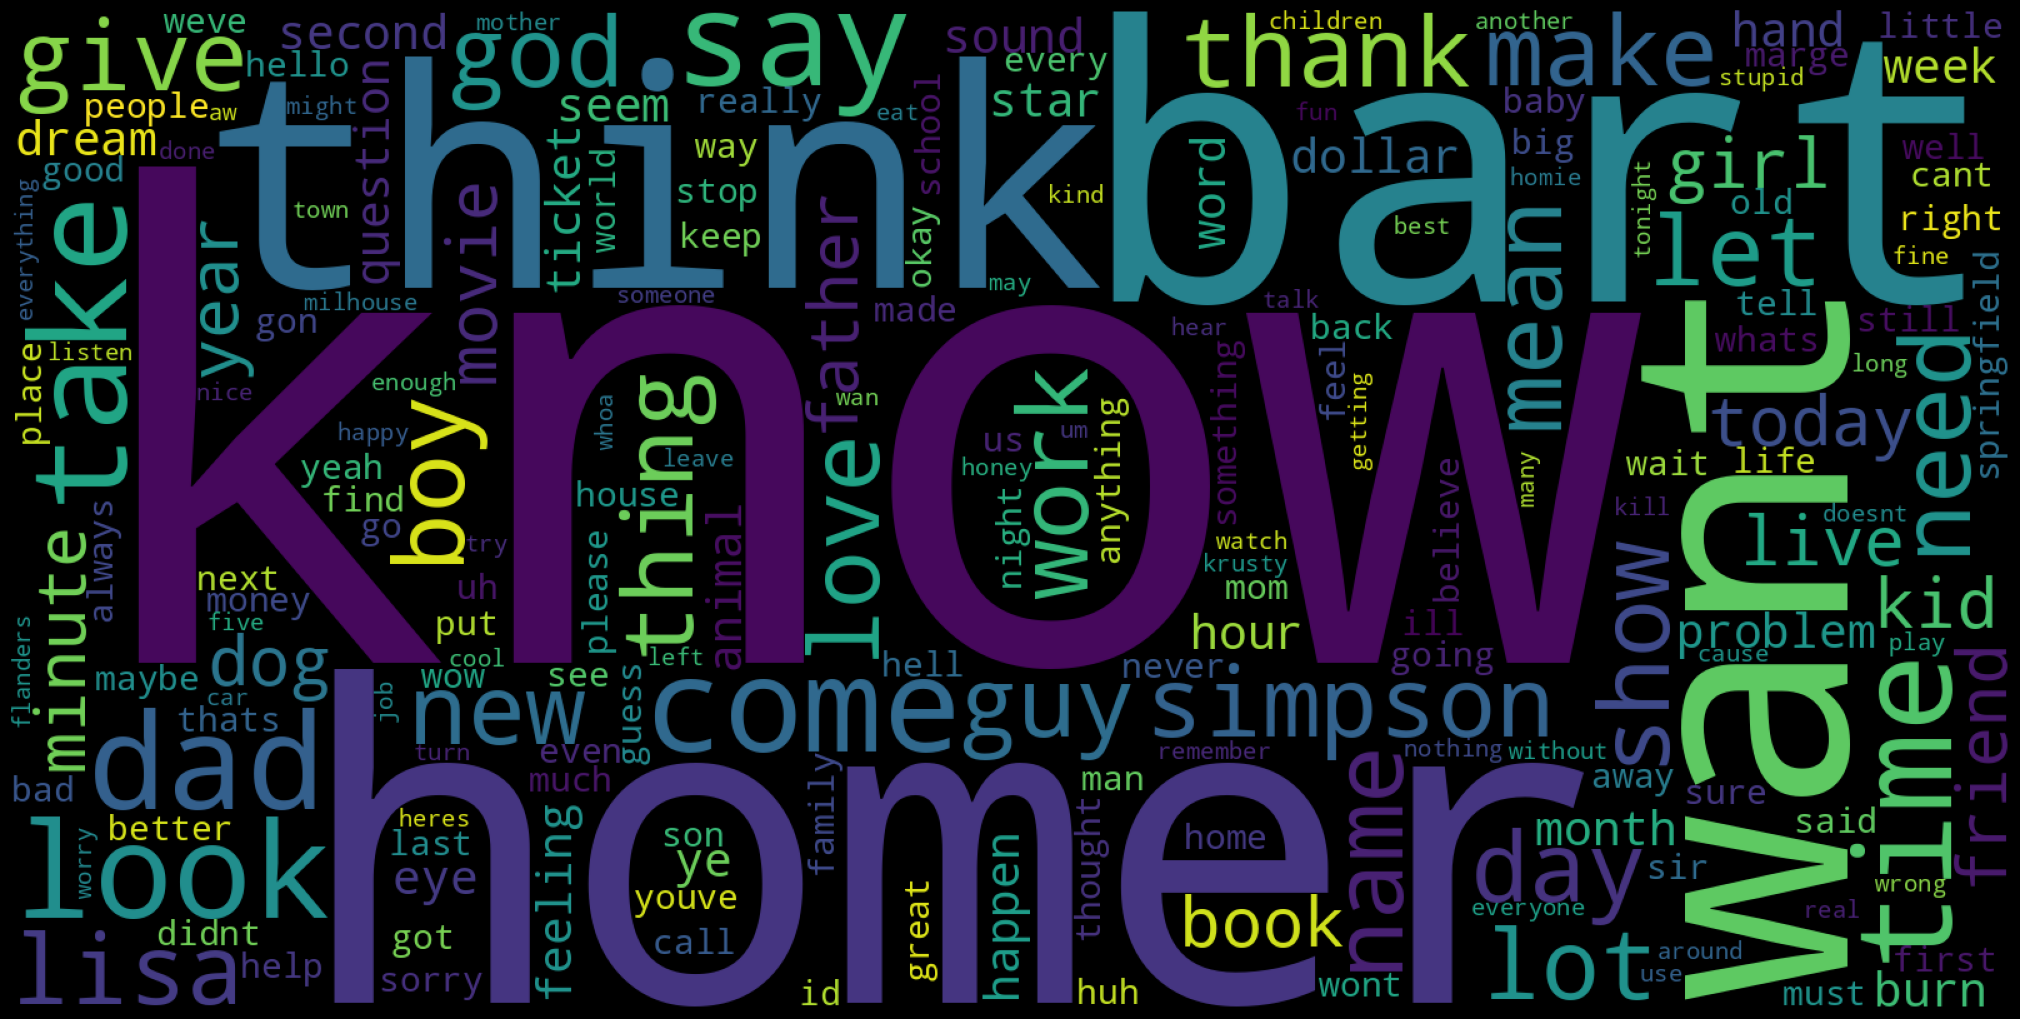

In [304]:
# переводим всё в текстовый формат
text_raw = " ".join(b)
# готовим размер картинки
wordcloud = WordCloud(width=1600, height=800).generate(text_raw)
plt.figure( figsize=(20,10), facecolor='k')
# добавляем туда облако слов
plt.imshow(wordcloud)
# выключаем оси и подписи
plt.axis("off")
# убираем рамку вокруг
plt.tight_layout(pad=0)
# выводим картинку на экран
plt.show()

## 3.3. TSNE ( t-distributed stochastic neighbor embedding (стохастическое вложение соседей с t-распределением)

In [ ]:
X_embedded = TSNE(n_components=1000, learning_rate='auto',
                  init='random', perplexity=5).fit_transform(words)
X_embedded.shape

##3.4. Umap

# 4. Найти самые близкие слова для:
* homer - marge + bart
* bart - lisa + school
* marge - homer + home

In [281]:
model = all_models['Word2Vec']
print('homer - marge + bart =', model.wv.most_similar(positive=["homer", "bart"], negative=["marge"], topn=5))
print('bart - lisa + school =', model.wv.most_similar(positive=["bart", 'school'], negative=["liza"], topn=5))
print('marge - homer + home = =', model.wv.most_similar(positive=["marge", 'home'], negative=["homer"], topn=5))

homer - marge + bart = [('lisa', 0.8780383467674255), ('mrs', 0.833343505859375), ('bartholomew', 0.7707120180130005), ('abe', 0.7706344127655029), ('eliza', 0.7677978277206421)]
bart - lisa + school = [('lisa', 0.7620497345924377), ('family', 0.6674869656562805), ('marge', 0.5844172239303589), ('homer', 0.5655077695846558), ('children', 0.5632976293563843)]
marge - homer + home = = [('bed', 0.8963550329208374), ('come', 0.8623800277709961), ('sleep', 0.8575306534767151), ('back', 0.8470888137817383), ('dinner', 0.8421816825866699)]


In [282]:
model = all_models['FastText']
print('homer - marge + bart =', model.wv.most_similar(positive=["homer", "bart"], negative=["marge"], topn=5))
print('bart - lisa + school =', model.wv.most_similar(positive=["bart", 'school'], negative=["liza"], topn=5))
print('marge - homer + home = =', model.wv.most_similar(positive=["marge", 'home'], negative=["homer"], topn=5))

homer - marge + bart = [('barto', 0.8494371175765991), ('barty', 0.8265275955200195), ('barts', 0.8141340613365173), ('bartron', 0.8130698204040527), ('bart-dude', 0.8027424812316895)]
bart - lisa + school = [('schoolyard', 0.7362101674079895), ('schools', 0.7358441352844238), ('schoolgirl', 0.7349228262901306), ('teacher', 0.6437450051307678), ('teachers', 0.6002461910247803)]
marge - homer + home = = [('dinners', 0.8460335731506348), ('dinnertime', 0.8279260396957397), ('dinner', 0.8244881629943848), ('homey', 0.8156791925430298), ('homework', 0.8083363175392151)]


In [283]:
model = all_models['Compressed_FastText']
print('homer - marge + bart =', model.most_similar(positive=["homer", "bart"], negative=["marge"], topn=5))
print('bart - lisa + school =',model.most_similar(positive=["bart", 'school'], negative=["liza"], topn=5))
print('marge - homer + home = =', model.most_similar(positive=["marge", 'home'], negative=["homer"], topn=5))

homer - marge + bart = [('home', 0.4245820503473717), ('touch', 0.39144602070123974), ('smart', 0.3885295721446393), ('xp', 0.38665133738793567), ('pro', 0.38498976242832067)]
bart - lisa + school = [('university', 0.5340365320310575), ('high', 0.516045805981632), ('center', 0.4914185192588084), ('house', 0.4492124972093197), ('international', 0.4305582012220689)]
marge - homer + home = = [('with', 0.5992566160064897), ('me', 0.5461710239117095), ('group', 0.5420430960032139), ('my', 0.5380046980601086), ('and', 0.5373622978938561)]


# 5. Построить классификатор bart/lisa с использованием эмбеддингов